# Motor Vehicle Collisions - Crashes
Datos sobre accidentes vehiculares en la ciudad de Nueva York
Datos hasta agosto de 2024

# Carga de datos
Una vez que tengamos nuestros datos del archivo 'Motor_Vehicle_Collisions_-_Crashes_20241009.csv', lo siguiente será localizarlos en la carpeta del proyecto, posteriormente haciendo uso de la libreria pandas, leeremos el documento y crearemos un nuevo objeto 'df' que contendra estos datos. Una vez completado podremos ver los datos.

In [4]:
!pip install geopandas
!pip install geodatasets
!pip install folium

In [5]:
import pandas as pd
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
from geodatasets import get_path
import folium
from folium import plugins

In [6]:
df = pd.read_csv('./Motor_Vehicle_Collisions_-_Crashes_20241008.csv')
df

/var/folders/b0/dp8wl00d6lv4rmt4t_xk65sh0000gn/T/ipykernel_83283/755350310.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Motor_Vehicle_Collisions_-_Crashes_20241008.csv')


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129376,10/22/2024,10:20,QUEENS,11422.0,40.665257,-73.739555,"(40.665257, -73.739555)",SOUTH CONDUIT AVENUE,BROOKVILLE BOULEVARD,NaN,...,Unspecified,NaN,NaN,NaN,4765801,Station Wagon/Sport Utility Vehicle,Taxi,NaN,NaN,NaN
2129377,10/22/2024,17:15,MANHATTAN,10035.0,40.804375,-73.937420,"(40.804375, -73.93742)",LEXINGTON AVENUE,EAST 125 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4765641,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
2129378,10/18/2024,14:07,QUEENS,11368.0,40.756462,-73.867300,"(40.756462, -73.8673)",NaN,NaN,33-54 101 STREET,...,Unspecified,Unspecified,NaN,NaN,4766045,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,NaN,NaN
2129379,10/22/2024,8:40,MANHATTAN,10016.0,40.740902,-73.978360,"(40.740902, -73.97836)",NaN,NaN,244 EAST 28 STREET,...,Other Vehicular,NaN,NaN,NaN,4766067,Sedan,Sedan,NaN,NaN,NaN


## NaN
Removemos los NaN de los datos para que no se propaguen y no causen problemas futuros 

In [8]:
df = df.fillna('0')
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,0,0,0,0,0,WHITESTONE EXPRESSWAY,20 AVENUE,0,...,Unspecified,0,0,0,4455765,Sedan,Sedan,0,0,0
1,03/26/2022,11:45,0,0,0,0,0,QUEENSBORO BRIDGE UPPER,0,0,...,0,0,0,0,4513547,Sedan,0,0,0,0
2,06/29/2022,6:55,0,0,0,0,0,THROGS NECK BRIDGE,0,0,...,Unspecified,0,0,0,4541903,Sedan,Pick-up Truck,0,0,0
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.8665,"(40.667202, -73.8665)",0,0,1211 LORING AVENUE,...,0,0,0,0,4456314,Sedan,0,0,0,0
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0,...,0,0,0,0,4486609,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129376,10/22/2024,10:20,QUEENS,11422.0,40.665257,-73.739555,"(40.665257, -73.739555)",SOUTH CONDUIT AVENUE,BROOKVILLE BOULEVARD,0,...,Unspecified,0,0,0,4765801,Station Wagon/Sport Utility Vehicle,Taxi,0,0,0
2129377,10/22/2024,17:15,MANHATTAN,10035.0,40.804375,-73.93742,"(40.804375, -73.93742)",LEXINGTON AVENUE,EAST 125 STREET,0,...,Unspecified,0,0,0,4765641,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0
2129378,10/18/2024,14:07,QUEENS,11368.0,40.756462,-73.8673,"(40.756462, -73.8673)",0,0,33-54 101 STREET,...,Unspecified,Unspecified,0,0,4766045,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,0,0
2129379,10/22/2024,8:40,MANHATTAN,10016.0,40.740902,-73.97836,"(40.740902, -73.97836)",0,0,244 EAST 28 STREET,...,Other Vehicular,0,0,0,4766067,Sedan,Sedan,0,0,0


## Cantidad de accidentes por ciudad
procedemos a crear otro dataframe pero ahora con los datos de las ciudades, posteriormente contaremos cuantos registros tiene cada ciudad y finalmente lo graficamos para ver los datos de manera mas clara.

In [10]:
cities = df['BOROUGH']

In [11]:
cities_counts = df['BOROUGH'].value_counts()

In [12]:
citiesTotal= {'Brooklyn': cities_counts.get('BROOKLYN',0),
             'Bronx': cities_counts.get('BRONX',0),
             'Manhattan': cities_counts.get('MANHATTAN',0),
             'Queens': cities_counts.get('QUEENS',0),
             'StatenIsland': cities_counts.get('STATEN ISLAND',0),
             'Not Available': cities_counts.get('0',0
                                               )}

In [13]:
ocurrences = cities.unique()

In [14]:
citiesTotal
citiesTotal_Df = DataFrame.from_dict(citiesTotal, orient = 'index', columns=['Count'])



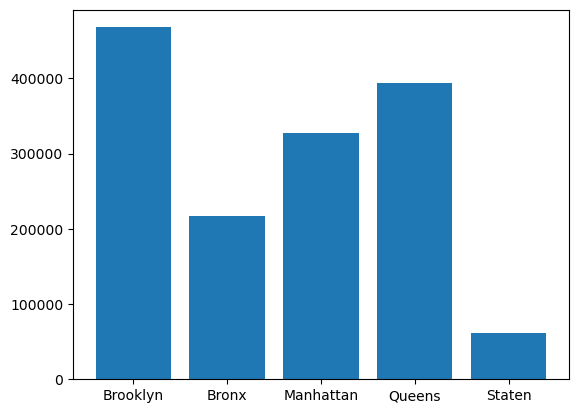

In [15]:
names = ['Brooklyn', 'Bronx', 'Manhattan', 'Queens', 'Staten']
values = [
    citiesTotal_Df.loc['Brooklyn', 'Count'],
    citiesTotal_Df.loc['Bronx', 'Count'],
    citiesTotal_Df.loc['Manhattan', 'Count'],
    citiesTotal_Df.loc['Queens', 'Count'],
    citiesTotal_Df.loc['StatenIsland', 'Count'],
]
plt.bar(names, values)
plt.show()

# Queens
## Numero de accidentes por calle en Queens
Comenzando con la ciudad de Queens, realizaremos un dataframe con los registros en esta ciudad, calcularemos el promedio de accidentes y graficaremos las calles con mayor cantidad de accidentes.

In [17]:
df_queens = df.loc[df['BOROUGH']=='QUEENS']
df_queens['ON STREET NAME'] = df_queens['ON STREET NAME'].replace('0', 'UNKNOWN')
df_queens

/var/folders/b0/dp8wl00d6lv4rmt4t_xk65sh0000gn/T/ipykernel_83283/219992538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_queens['ON STREET NAME'] = df_queens['ON STREET NAME'].replace('0', 'UNKNOWN')


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
11,12/14/2021,16:50,QUEENS,11413.0,40.675884,-73.75577,"(40.675884, -73.75577)",SPRINGFIELD BOULEVARD,EAST GATE PLAZA,0,...,Unspecified,0,0,0,4487127,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0
14,12/14/2021,23:10,QUEENS,11434.0,40.66684,-73.78941,"(40.66684, -73.78941)",NORTH CONDUIT AVENUE,150 STREET,0,...,Unspecified,0,0,0,4486635,Sedan,Sedan,0,0,0
22,12/13/2021,6:30,QUEENS,11372.0,40.75373,-73.88505,"(40.75373, -73.88505)",82 STREET,34 AVENUE,0,...,0,0,0,0,4486967,Sedan,0,0,0,0
30,12/12/2021,9:00,QUEENS,11385.0,40.70447,-73.90148,"(40.70447, -73.90148)",UNKNOWN,0,59-14 67 AVENUE,...,Unspecified,0,0,0,4486933,Station Wagon/Sport Utility Vehicle,0,0,0,0
44,04/24/2022,6:00,QUEENS,11411.0,0.0,0.0,"(0.0, 0.0)",UNKNOWN,0,116-44 234 STREET,...,Unspecified,0,0,0,4521460,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129362,10/22/2024,22:45,QUEENS,11374.0,40.72837,-73.87114,"(40.72837, -73.87114)",WOODHAVEN BOULEVARD,ALDERTON STREET,0,...,Driver Inattention/Distraction,0,0,0,4765702,Sedan,Van,0,0,0
2129364,10/22/2024,14:30,QUEENS,11365.0,40.74201,-73.77513,"(40.74201, -73.77513)",UNKNOWN,0,61-00 FRANCIS LEWIS BOULEVARD,...,Unspecified,0,0,0,4765571,Sedan,Sedan,0,0,0
2129367,10/22/2024,11:50,QUEENS,11106.0,40.767193,-73.93759,"(40.767193, -73.93759)",UNKNOWN,0,32-50 VERNON BOULEVARD,...,Unspecified,0,0,0,4766015,Station Wagon/Sport Utility Vehicle,0,0,0,0
2129376,10/22/2024,10:20,QUEENS,11422.0,40.665257,-73.739555,"(40.665257, -73.739555)",SOUTH CONDUIT AVENUE,BROOKVILLE BOULEVARD,0,...,Unspecified,0,0,0,4765801,Station Wagon/Sport Utility Vehicle,Taxi,0,0,0


In [18]:
cont_calles_queens = df_queens['ON STREET NAME'].value_counts()
cont_calles_queens

ON STREET NAME
UNKNOWN                             83345
NORTHERN BOULEVARD                   8852
QUEENS BOULEVARD                     6732
WOODHAVEN BOULEVARD                  4368
HILLSIDE AVENUE                      4052
                                    ...  
218 street                              1
Junction boulevard                      1
213 street                              1
Jordan St                               1
CEDARCROFT ROAD                         1
Name: count, Length: 4444, dtype: int64

In [19]:
promedio_calles_queens = cont_calles_queens.mean()
promedio_calles_queens

88.56120612061206

In [20]:
top_calles_queens = cont_calles_queens.head(8)
top_calles_queens

ON STREET NAME
UNKNOWN                             83345
NORTHERN BOULEVARD                   8852
QUEENS BOULEVARD                     6732
WOODHAVEN BOULEVARD                  4368
HILLSIDE AVENUE                      4052
NORTH CONDUIT AVENUE                 3951
JAMAICA AVENUE                       3499
ROCKAWAY BOULEVARD                   3436
Name: count, dtype: int64

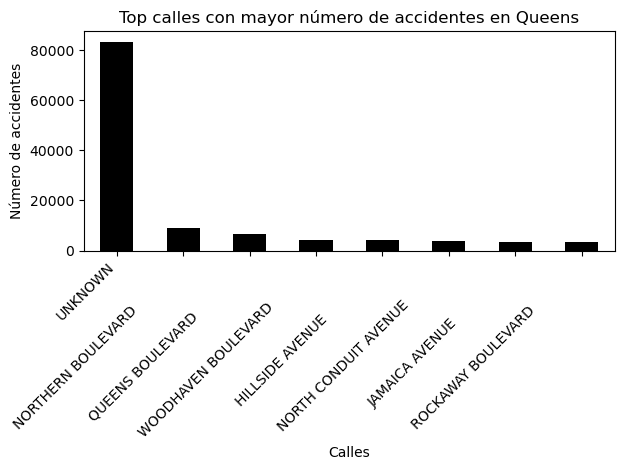

In [21]:
plt.figure()
top_calles_queens.plot(kind='bar', color='black')
plt.title('Top calles con mayor número de accidentes en Queens')
plt.xlabel('Calles')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
top_calles_queens = cont_calles_queens.head(8).iloc[1:]
top_calles_queens

ON STREET NAME
NORTHERN BOULEVARD                  8852
QUEENS BOULEVARD                    6732
WOODHAVEN BOULEVARD                 4368
HILLSIDE AVENUE                     4052
NORTH CONDUIT AVENUE                3951
JAMAICA AVENUE                      3499
ROCKAWAY BOULEVARD                  3436
Name: count, dtype: int64

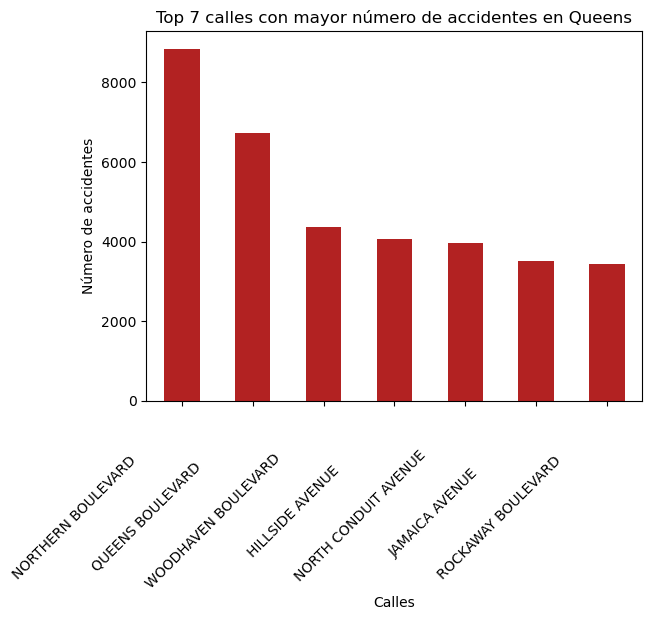

In [23]:
plt.figure()
top_calles_queens.plot(kind='bar', color='firebrick')
plt.title('Top 7 calles con mayor número de accidentes en Queens')
plt.xlabel('Calles')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45, ha='right')
plt.show()

## Numero de accidentes por tipo de coche en Queens

In [25]:
cont_coches_queens = df_queens['VEHICLE TYPE CODE 1'].value_counts()
cont_coches_queens

VEHICLE TYPE CODE 1
Sedan                                  109773
Station Wagon/Sport Utility Vehicle     94250
PASSENGER VEHICLE                       89081
SPORT UTILITY / STATION WAGON           38074
4 dr sedan                               7408
                                        ...  
NS AM                                       1
SWT                                         1
CHERR                                       1
pas                                         1
Stand Up S                                  1
Name: count, Length: 540, dtype: int64

In [26]:
top_coches_queens = cont_coches_queens.head(8)
top_coches_queens

VEHICLE TYPE CODE 1
Sedan                                  109773
Station Wagon/Sport Utility Vehicle     94250
PASSENGER VEHICLE                       89081
SPORT UTILITY / STATION WAGON           38074
4 dr sedan                               7408
Pick-up Truck                            6556
UNKNOWN                                  4501
Taxi                                     4068
Name: count, dtype: int64

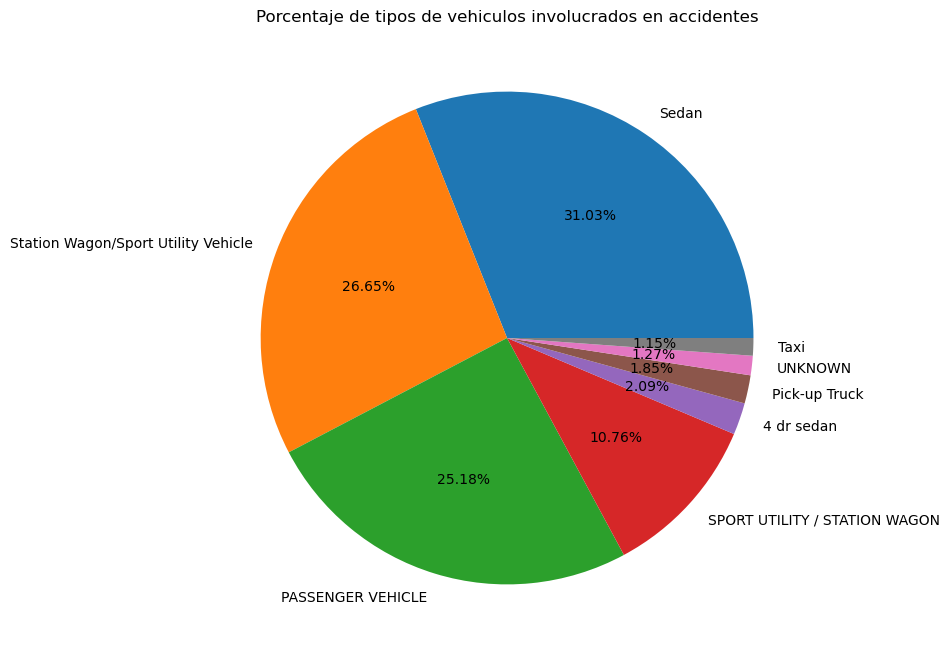

In [27]:
plt.figure(figsize=(8, 8))
plt.pie(top_coches_queens,labels=top_coches_queens.index,autopct='%1.2f%%')
plt.title("Porcentaje de tipos de vehiculos involucrados en accidentes")
plt.show()

In [28]:
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'], errors='coerce')
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'], errors='coerce')

In [29]:
dataCoord = df[(df['LATITUDE'] != 0)&(df['LONGITUDE'] != 0)]
dataCoord

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",0,0,1211 LORING AVENUE,...,0,0,0,0,4456314,Sedan,0,0,0,0
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,0,...,0,0,0,0,4486609,0,0,0,0,0
6,12/14/2021,17:05,0,0,40.709183,-73.956825,"(40.709183, -73.956825)",BROOKLYN QUEENS EXPRESSWAY,0,0,...,Unspecified,0,0,0,4486555,Sedan,Tractor Truck Diesel,0,0,0
7,12/14/2021,8:17,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",0,0,344 BAYCHESTER AVENUE,...,Unspecified,0,0,0,4486660,Sedan,Sedan,0,0,0
8,12/14/2021,21:10,BROOKLYN,11207.0,40.671720,-73.897100,"(40.67172, -73.8971)",0,0,2047 PITKIN AVENUE,...,Unspecified,0,0,0,4487074,Sedan,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129376,10/22/2024,10:20,QUEENS,11422.0,40.665257,-73.739555,"(40.665257, -73.739555)",SOUTH CONDUIT AVENUE,BROOKVILLE BOULEVARD,0,...,Unspecified,0,0,0,4765801,Station Wagon/Sport Utility Vehicle,Taxi,0,0,0
2129377,10/22/2024,17:15,MANHATTAN,10035.0,40.804375,-73.937420,"(40.804375, -73.93742)",LEXINGTON AVENUE,EAST 125 STREET,0,...,Unspecified,0,0,0,4765641,Sedan,Station Wagon/Sport Utility Vehicle,0,0,0
2129378,10/18/2024,14:07,QUEENS,11368.0,40.756462,-73.867300,"(40.756462, -73.8673)",0,0,33-54 101 STREET,...,Unspecified,Unspecified,0,0,4766045,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,0,0
2129379,10/22/2024,8:40,MANHATTAN,10016.0,40.740902,-73.978360,"(40.740902, -73.97836)",0,0,244 EAST 28 STREET,...,Other Vehicular,0,0,0,4766067,Sedan,Sedan,0,0,0


In [30]:
geometry = [Point(xy) for xy in zip(dataCoord['LATITUDE'], dataCoord['LONGITUDE'])]

In [31]:
collisions = gpd.GeoDataFrame(dataCoord, geometry=geometry, crs='EPSG:4326')

ValueError: aspect must be finite and positive 

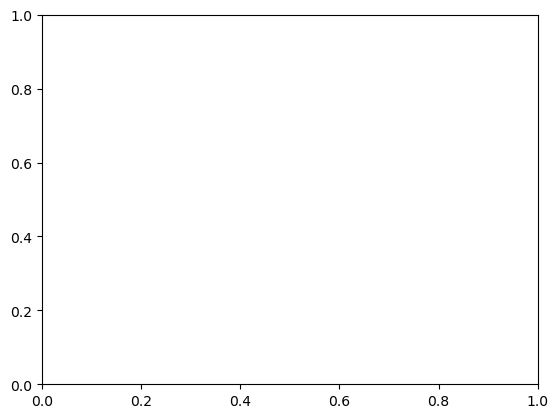

In [32]:
collisions.plot()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

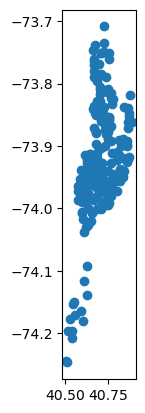

In [33]:
sampled_collisions = collisions.sample(n=200, random_state=8)
sampled_collisions.plot()
plt.show

In [35]:
sampled_collisions['geometry'] = sampled_collisions.apply(
    lambda x: Point((x['LONGITUDE'], x['LATITUDE'])), axis=1
)

In [37]:
sampled_collisions

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,geometry
860375,06/21/2017,13:50,STATEN ISLAND,10312.0,40.541843,-74.196720,"(40.541843, -74.19672)",HUGUENOT AVENUE,SINCLAIR AVENUE,0,...,0,0,0,3698131,Station Wagon/Sport Utility Vehicle,Sedan,0,0,0,POINT (-74.19672 40.54184)
210879,09/13/2020,11:20,QUEENS,11373.0,40.740097,-73.881260,"(40.740097, -73.88126)",0,0,83-03 CORNISH AVENUE,...,0,0,0,4347396,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,0,0,0,POINT (-73.88126 40.7401)
1885459,09/19/2012,20:48,QUEENS,11417,40.672151,-73.843181,"(40.6721508, -73.8431812)",CROSS BAY BOULEVARD,PITKIN AVENUE,0,...,Unspecified,0,0,228578,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,0,0,POINT (-73.84318 40.67215)
842663,07/24/2017,7:30,BROOKLYN,11216.0,40.675354,-73.952774,"(40.675354, -73.952774)",ROGERS AVENUE,SAINT MARKS AVENUE,0,...,0,0,0,3719873,Sedan,Sedan,0,0,0,POINT (-73.95277 40.67535)
841389,07/04/2017,10:30,0,0,40.753880,-73.760810,"(40.75388, -73.76081)",0,0,32 AVENUE,...,Unspecified,0,0,3704638,Sedan,Station Wagon/Sport Utility Vehicle,Sedan,0,0,POINT (-73.76081 40.75388)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503991,07/29/2014,14:35,BROOKLYN,11230,40.611490,-73.972397,"(40.6114903, -73.9723968)",AVENUE O,EAST 2 STREET,0,...,0,0,0,1000338,PASSENGER VEHICLE,PASSENGER VEHICLE,0,0,0,POINT (-73.9724 40.61149)
203930,10/13/2020,5:42,0,0,40.862210,-73.899650,"(40.86221, -73.89965)",EAST FORDHAM ROAD,0,0,...,Unspecified,Unspecified,0,4357273,Station Wagon/Sport Utility Vehicle,Van,Sedan,Station Wagon/Sport Utility Vehicle,0,POINT (-73.89965 40.86221)
1307833,07/10/2015,17:00,0,0,40.603070,-74.016666,"(40.6030702, -74.0166661)",0,0,0,...,0,0,0,3257999,PASSENGER VEHICLE,PASSENGER VEHICLE,0,0,0,POINT (-74.01667 40.60307)
540168,10/27/2018,0:05,QUEENS,11365.0,40.738140,-73.789280,"(40.73814, -73.78928)",0,0,184-02 64 AVENUE,...,Unspecified,0,0,4009050,Sedan,Sedan,0,0,0,POINT (-73.78928 40.73814)


In [39]:
my_map = folium.Map(
    location=[40.7,-74],
    zoom_start=9,
    tiles='Stamen Terrain'
)

basemaps = {
    'Google Maps' : folium.TileLayer(
        tiles= 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}',
        attr= 'Google',
        name= 'Google Maps',
        overlay= True,
        control= True
    ),
    'Google Satellite' : folium.TileLayer(
        tiles= 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}',
        attr= 'Google',
        name= 'Google Maps',
        overlay= True,
        control= True
    ),
    'Google Terrain' : folium.TileLayer(
        tiles= 'https://mt1.google.com/vt/lyrs=p&x={x}&y={y}&z={z}',
        attr= 'Google',
        name= 'Google Maps',
        overlay= True,
        control= True
    ),
    'Google Satellite Hybrid' : folium.TileLayer(
        tiles= 'https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
        attr= 'Google',
        name= 'Google Maps',
        overlay= True,
        control= True
    ),
    'Esri Satellite' : folium.TileLayer(
        tiles= 'https://server.arcgisionline.com/ArcGIS/reset/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr= 'Google',
        name= 'Google Maps',
        overlay= True,
        control= True
    )
}

basemaps['Google Satellite Hybrid'].add_to(my_map)
folium.GeoJson(sampled_collisions).add_to(my_map)
plugins.Fullscreen().add_to(my_map)
my_map

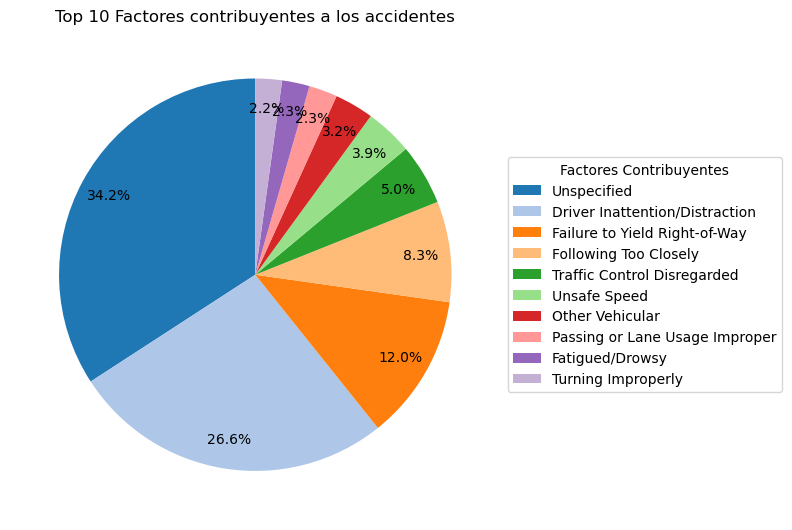

In [41]:
df['NUMBER OF PERSONS INJURED'] = pd.to_numeric(df['NUMBER OF PERSONS INJURED'], errors='coerce')
df = df.dropna(subset=['NUMBER OF PERSONS INJURED'])

df_grouped_pie = df.groupby('CONTRIBUTING FACTOR VEHICLE 1')['NUMBER OF PERSONS INJURED'].sum().nlargest(10)

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(df_grouped_pie, autopct='%1.1f%%', startangle=90, 
                                   pctdistance=0.85, colors=plt.cm.tab20.colors)

plt.legend(wedges, df_grouped_pie.index, title="Factores Contribuyentes", loc="center left", 
           bbox_to_anchor=(1, 0.5), fontsize=10)

plt.title('Top 10 Factores contribuyentes a los accidentes')
plt.tight_layout()

plt.show()

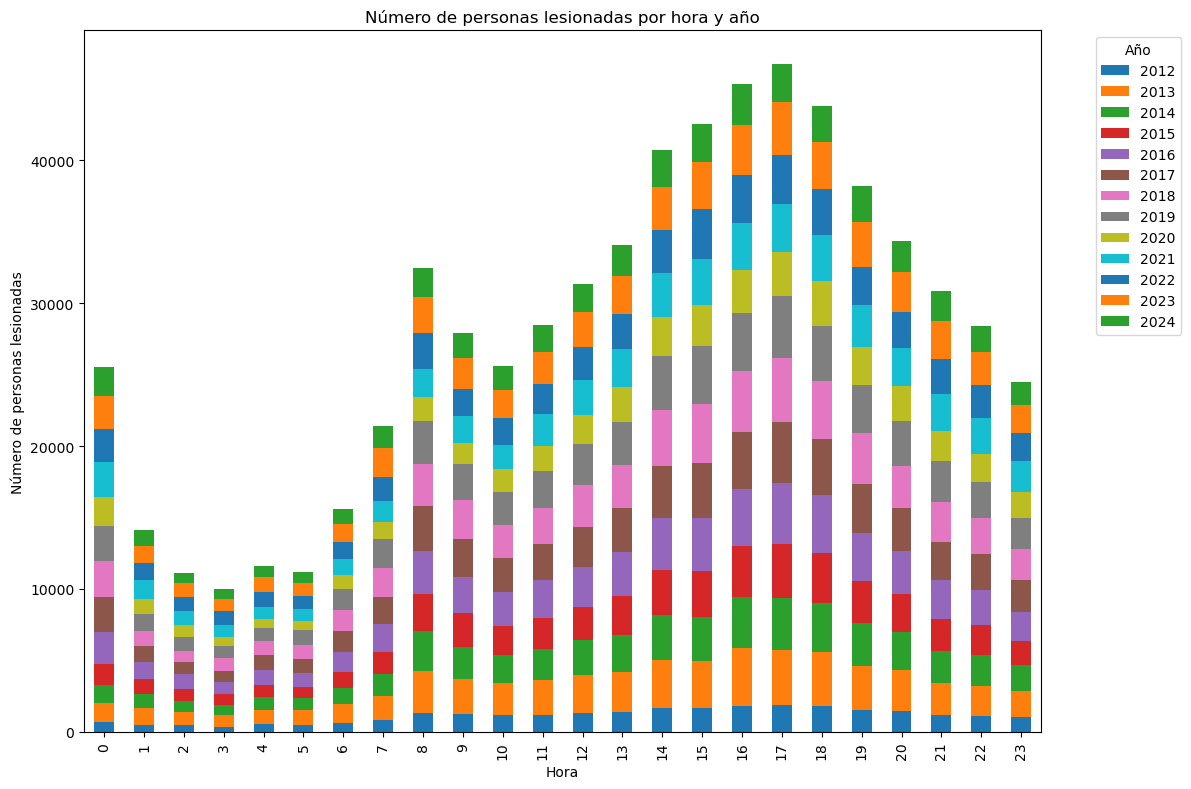

In [42]:
df = df.dropna(subset=['CRASH DATE', 'CRASH TIME', 'NUMBER OF PERSONS INJURED'])
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%m/%d/%Y', errors='coerce')
df['YEAR'] = df['CRASH DATE'].dt.year
df['HOUR'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M', errors='coerce').dt.hour

df_grouped = df.groupby(['HOUR', 'YEAR'])['NUMBER OF PERSONS INJURED'].sum().unstack(fill_value=0)
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Número de personas lesionadas por hora y año')
plt.xlabel('Hora')
plt.ylabel('Número de personas lesionadas')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

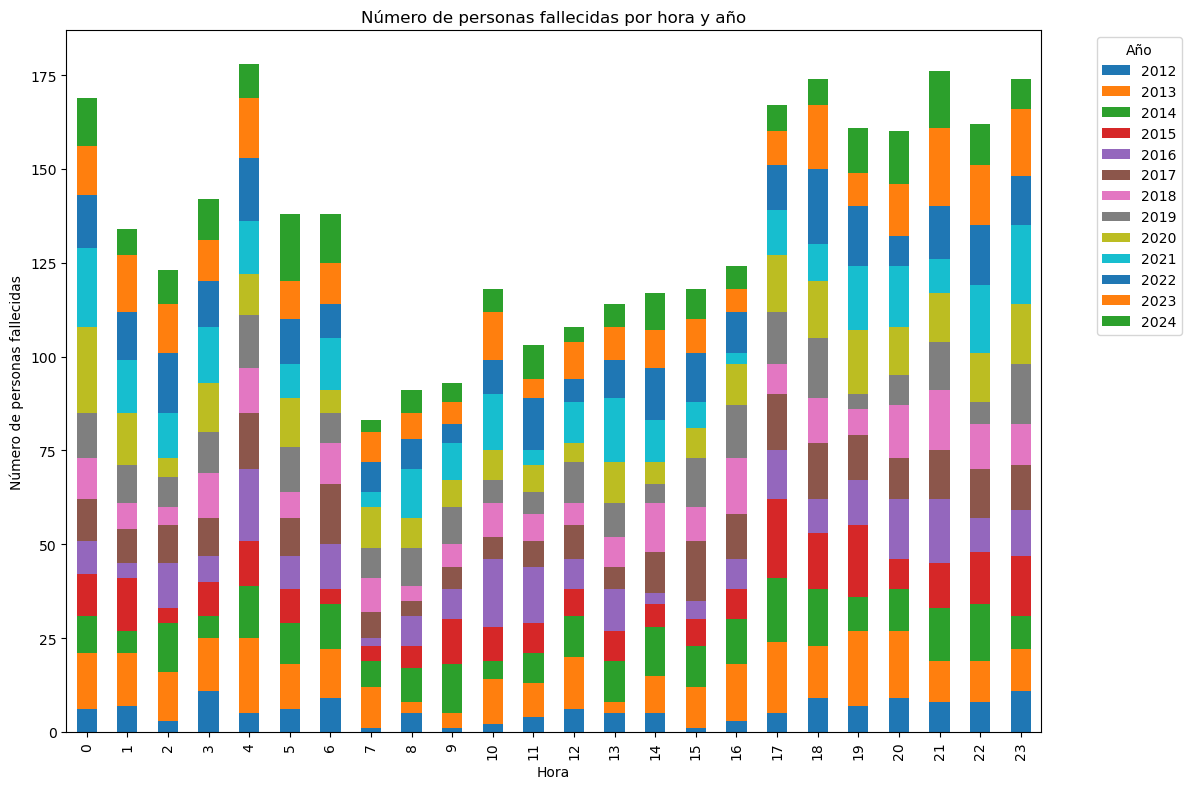

In [45]:
df['NUMBER OF PERSONS KILLED'] = pd.to_numeric(df['NUMBER OF PERSONS KILLED'], errors='coerce')
df['NUMBER OF PERSONS KILLED'] = df['NUMBER OF PERSONS KILLED'].fillna(0)

df_grouped = df.groupby(['HOUR', 'YEAR'])['NUMBER OF PERSONS KILLED'].sum().unstack(fill_value=0)
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Número de personas fallecidas por hora y año')
plt.xlabel('Hora')
plt.ylabel('Número de personas fallecidas')
plt.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

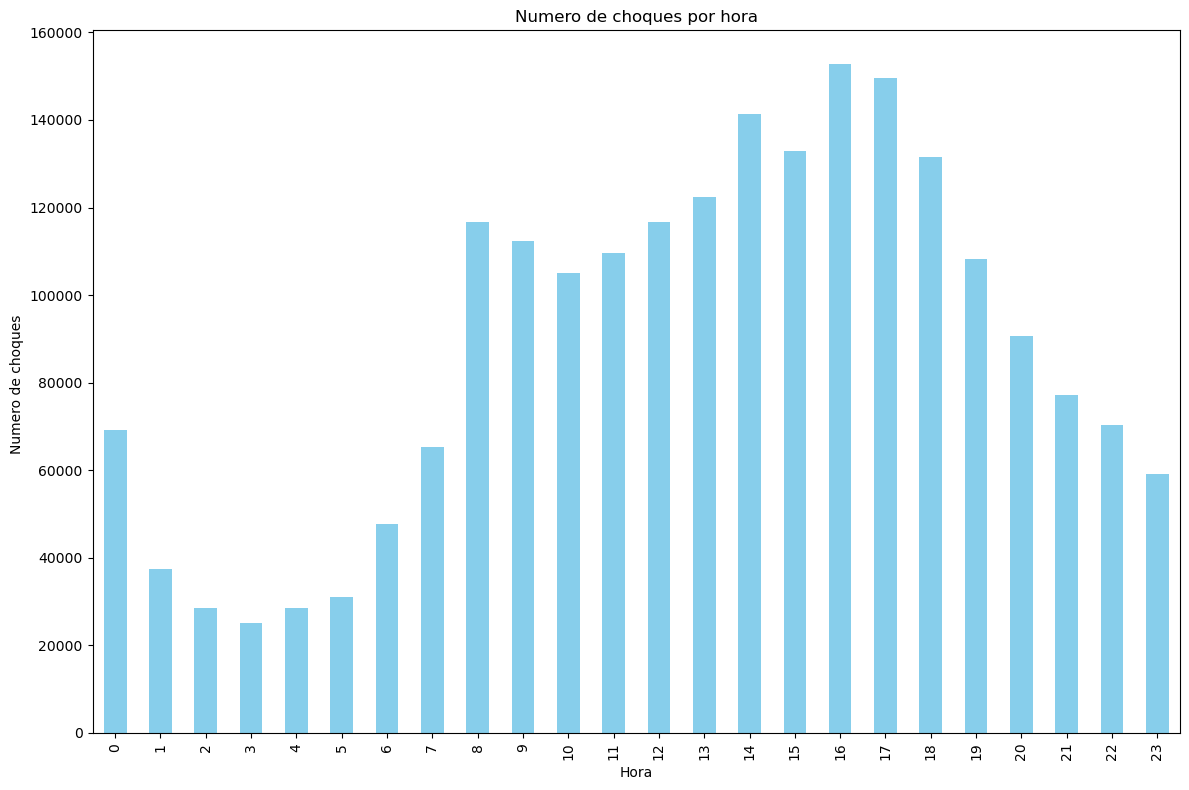

In [70]:
#Numero de choques por hora
df_hourly_total = df.groupby('HOUR').size()
df_hourly_total.plot(kind='bar',figsize=(12, 8),color='skyblue')

plt.title('Numero de choques por hora')
plt.xlabel('Hora')
plt.ylabel('Numero de choques ')
plt.tight_layout()

hora_max_choques = df_hourly_total.idxmax()
total_max_choques = df_hourly_total.max()

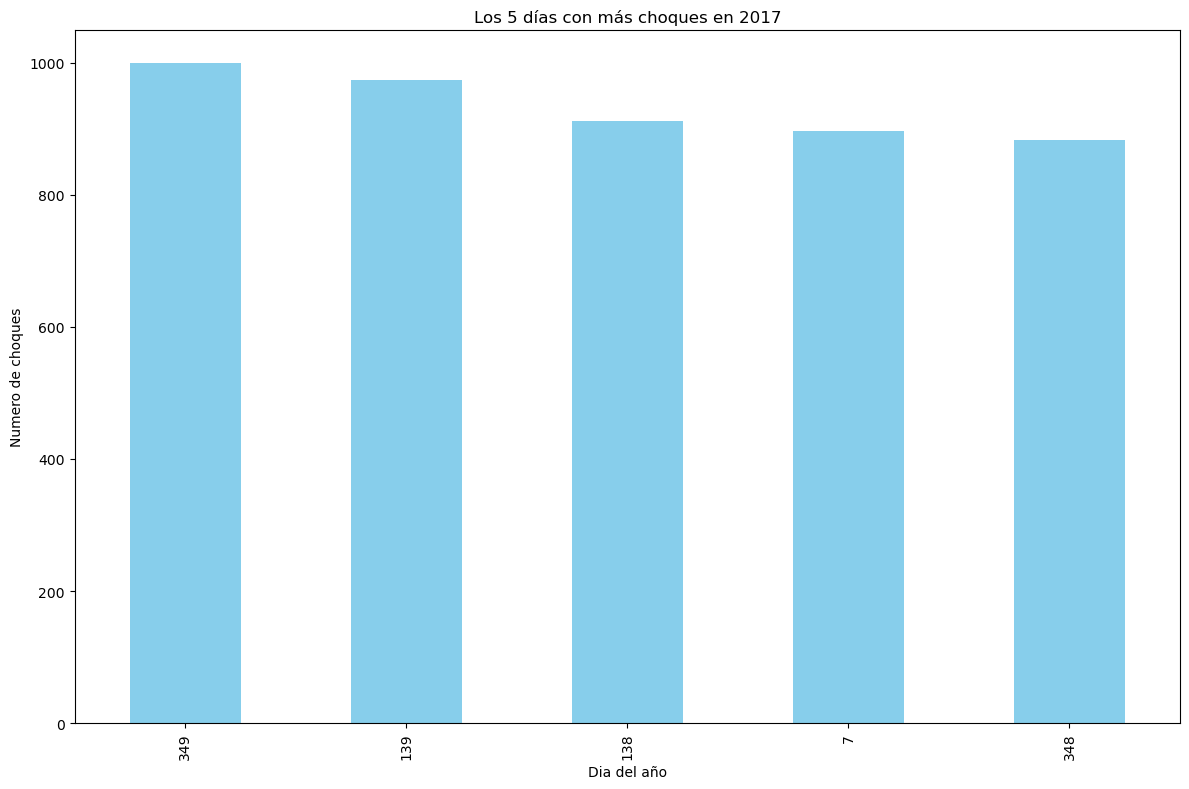

In [72]:
#Los dias con mas choques en el 2017 y años consecuentes
df_2017 = df[df['YEAR'] == 2017]
df_2017_daily_total = df_2017.groupby(df_2017['CRASH DATE'].dt.dayofyear).size()

df_2017_top5 = df_2017_daily_total.sort_values(ascending=False).head(5)
df_2017_top5.plot(kind='bar', figsize=(12, 8), color='skyblue')

plt.title('Los 5 días con más choques en 2017')
plt.xlabel('Dia del año')
plt.ylabel('Numero de choques')
plt.tight_layout()

plt.show()


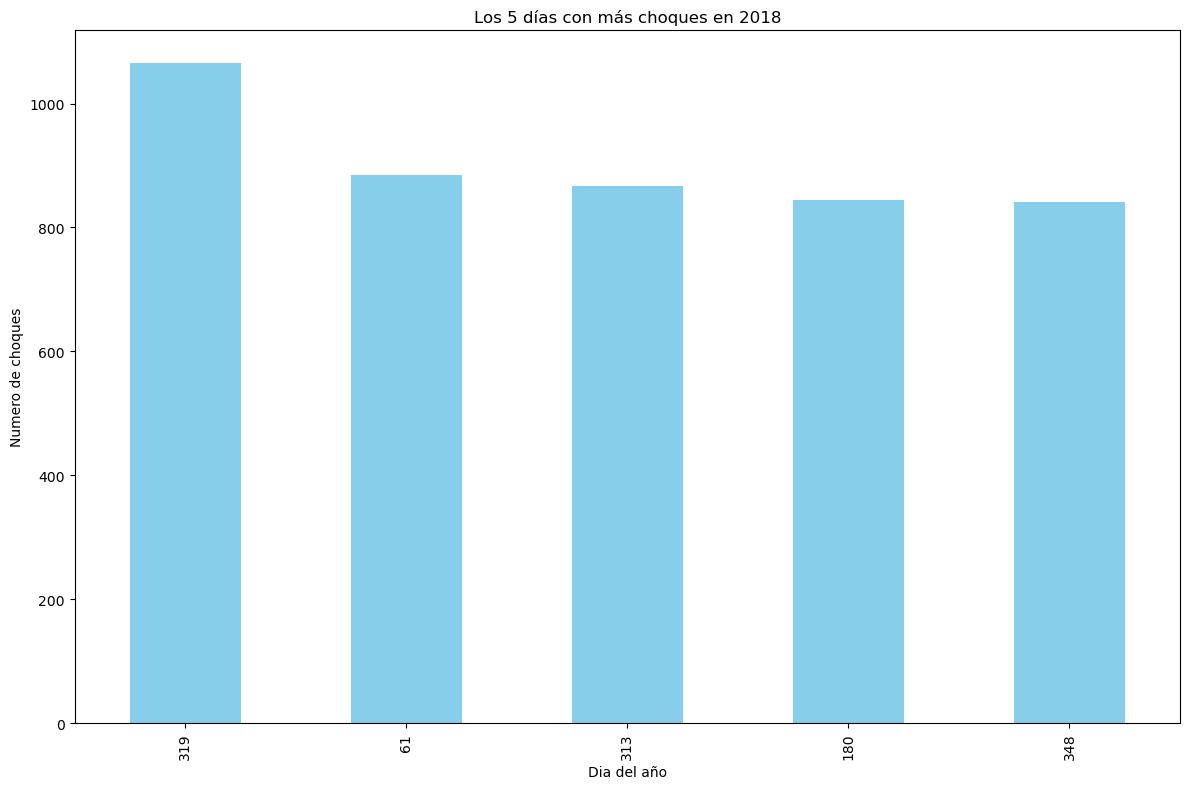

In [48]:
df_2018 = df[df['YEAR'] == 2018]
df_2018_daily_total = df_2018.groupby(df_2018['CRASH DATE'].dt.dayofyear).size()

df_2018_top5 = df_2018_daily_total.sort_values(ascending=False).head(5)
df_2018_top5.plot(kind='bar', figsize=(12, 8), color='skyblue')

plt.title('Los 5 días con más choques en 2018')
plt.xlabel('Dia del año')
plt.ylabel('Numero de choques')
plt.tight_layout()

plt.show()


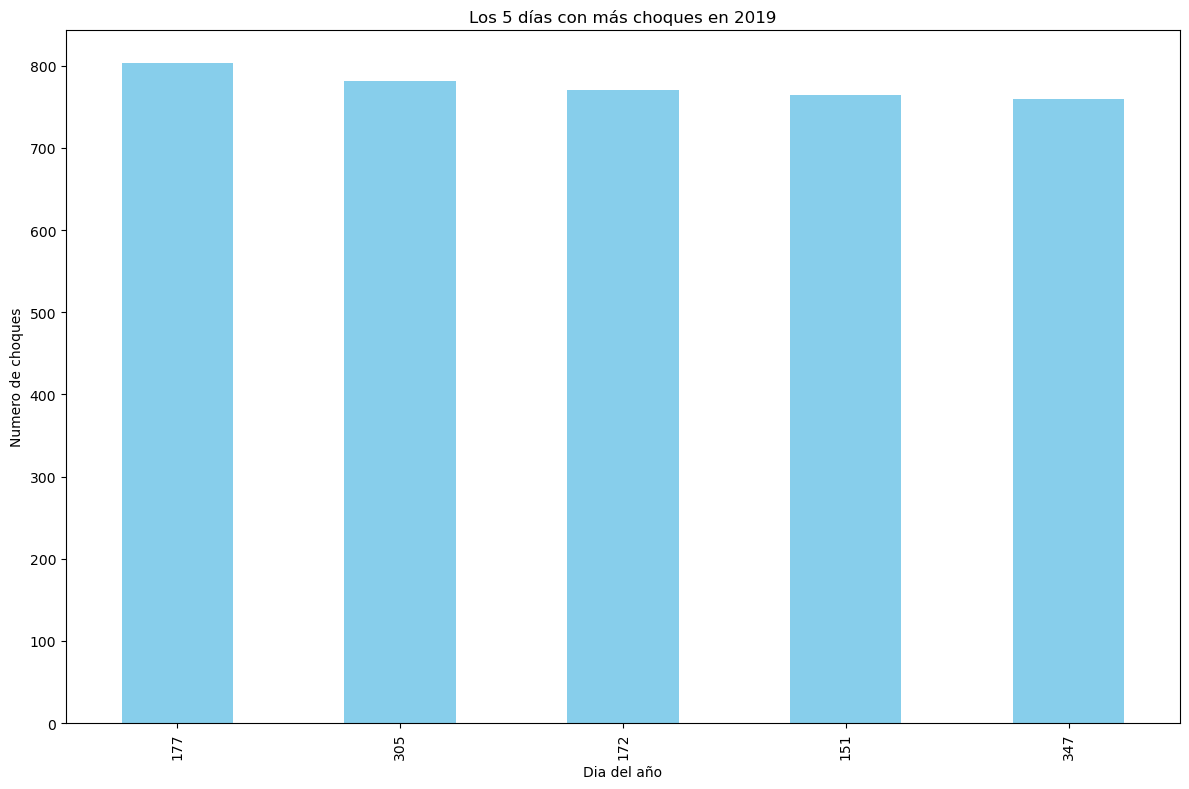

In [50]:
df_2019 = df[df['YEAR'] == 2019]
df_2019_daily_total = df_2019.groupby(df_2019['CRASH DATE'].dt.dayofyear).size()

df_2019_top5 = df_2019_daily_total.sort_values(ascending=False).head(5)
df_2019_top5.plot(kind='bar', figsize=(12, 8), color='skyblue')

plt.title('Los 5 días con más choques en 2019')
plt.xlabel('Dia del año')
plt.ylabel('Numero de choques')
plt.tight_layout()

plt.show()


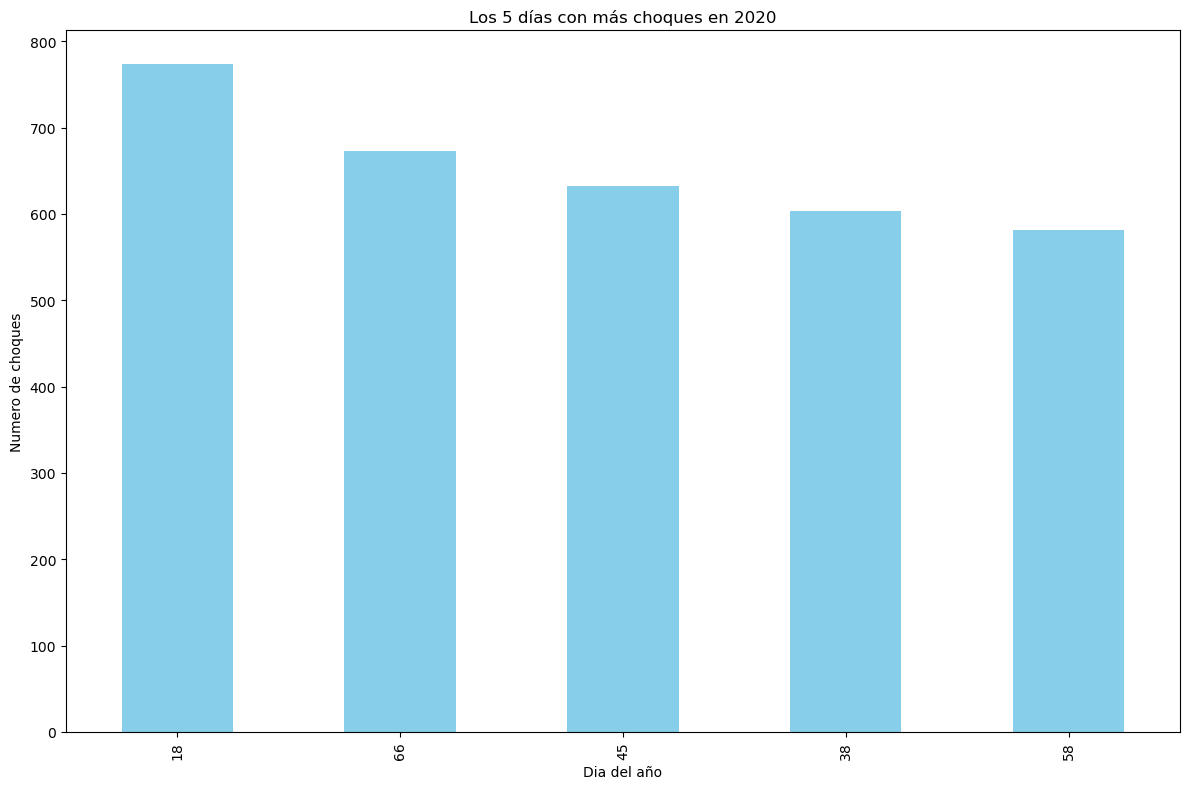

In [52]:
df_2020 = df[df['YEAR'] == 2020]
df_2020_daily_total = df_2020.groupby(df_2020['CRASH DATE'].dt.dayofyear).size()

df_2020_top5 = df_2020_daily_total.sort_values(ascending=False).head(5)
df_2020_top5.plot(kind='bar', figsize=(12, 8), color='skyblue')

plt.title('Los 5 días con más choques en 2020')
plt.xlabel('Dia del año')
plt.ylabel('Numero de choques')
plt.tight_layout()

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

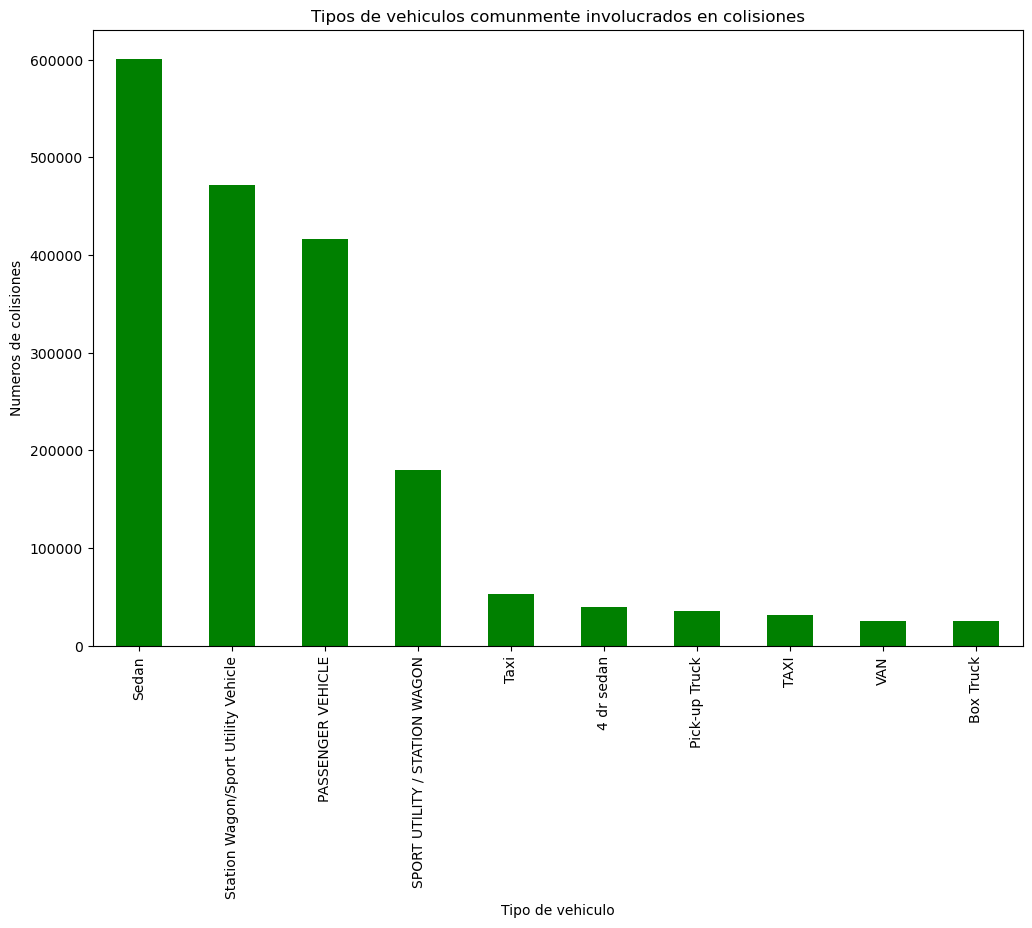

In [98]:
#Tipos de vehiculos mas involucrados en colisiones 
top_vehicle_types = df['VEHICLE TYPE CODE 1'].value_counts().head(10)
top_vehicle_types.plot(kind = 'bar',color = 'green',figsize=(12, 8),title = 'Tipos de vehiculos comunmente involucrados en colisiones')
plt.xlabel('Tipo de vehiculo')
plt.ylabel('Numeros de colisiones')
plt.show

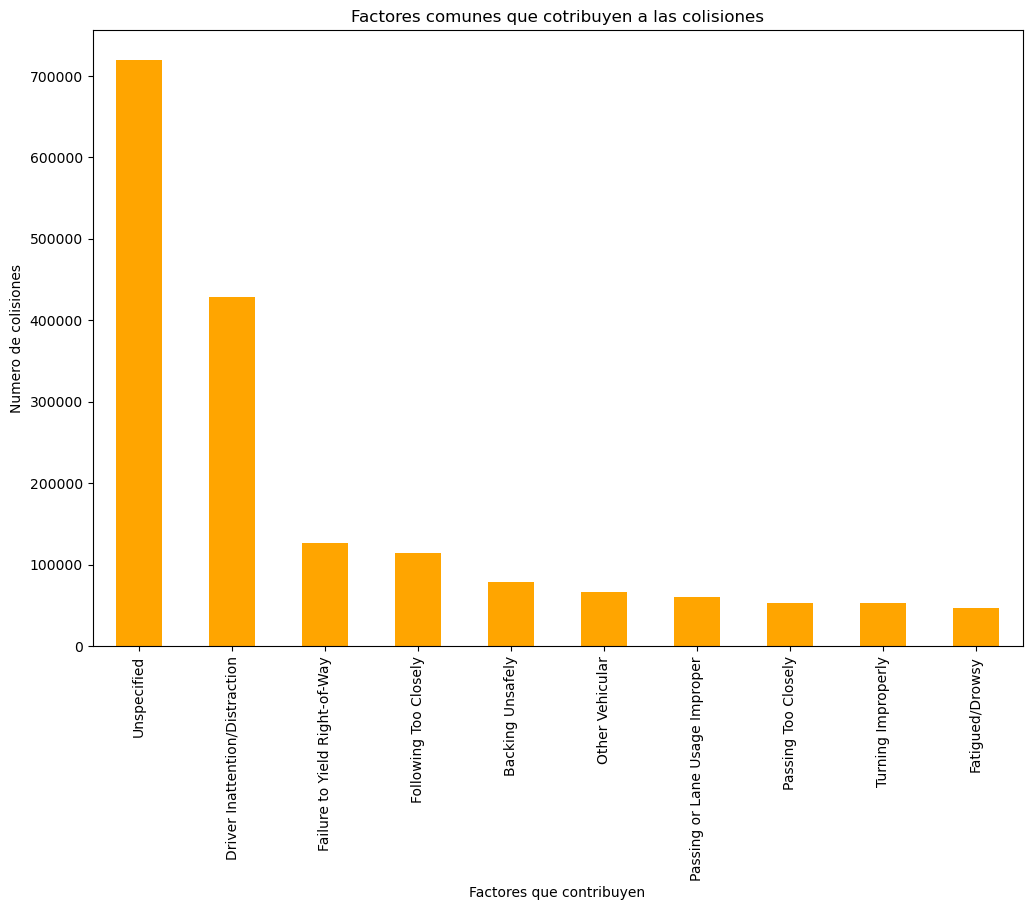

In [74]:
#Factores mas comunes que contribuyen a las colisiones 
top_contrubuting_factors = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)
top_contrubuting_factors.plot(kind= 'bar',figsize=(12, 8), color= 'orange',title= 'Factores comunes que cotribuyen a las colisiones')
plt.xlabel('Factores que contribuyen')
plt.ylabel('Numero de colisiones')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

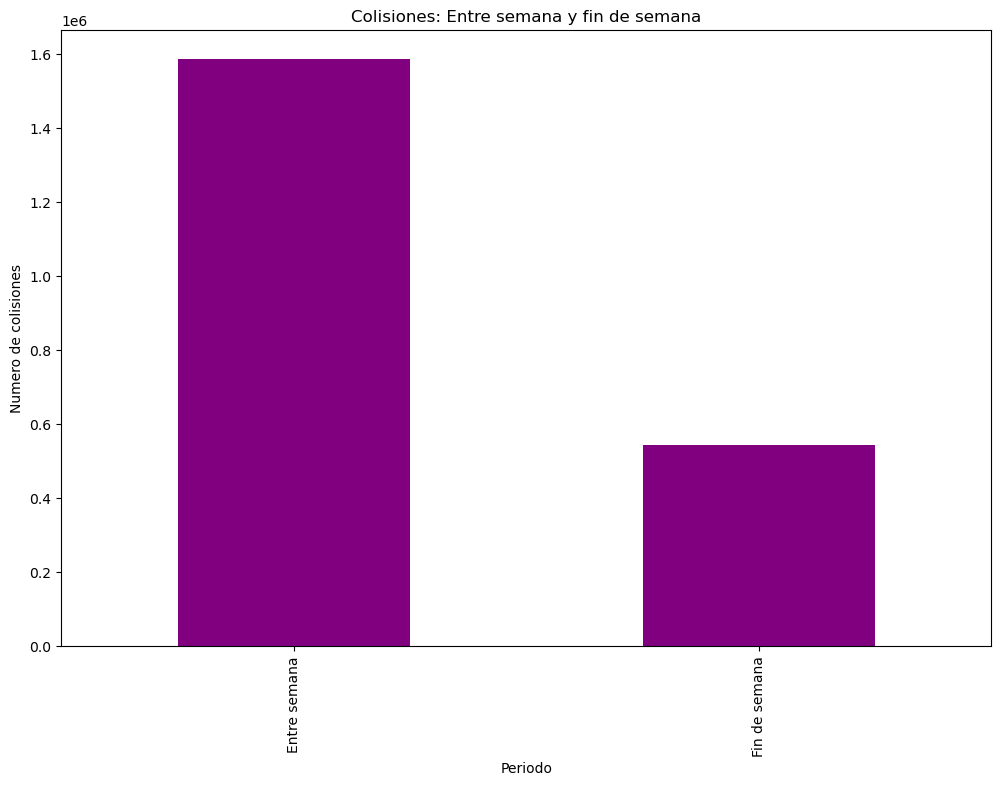

In [76]:
#Comparaciones de colisiones entre semana y fin de semana
df['Dia de la semana']= df['CRASH DATE'].dt.day_name()
df['Es fin de semana']= df['Dia de la semana'].isin(['Saturday','Sunday'])

weekend_and_weekday = df['Es fin de semana'].value_counts()
weekend_and_weekday.index = ['Entre semana','Fin de semana']
weekend_and_weekday.plot(kind='bar',figsize=(12, 8),color='purple',title= 'Colisiones: Entre semana y fin de semana')
plt.xlabel('Periodo')
plt.ylabel('Numero de colisiones')
plt.show

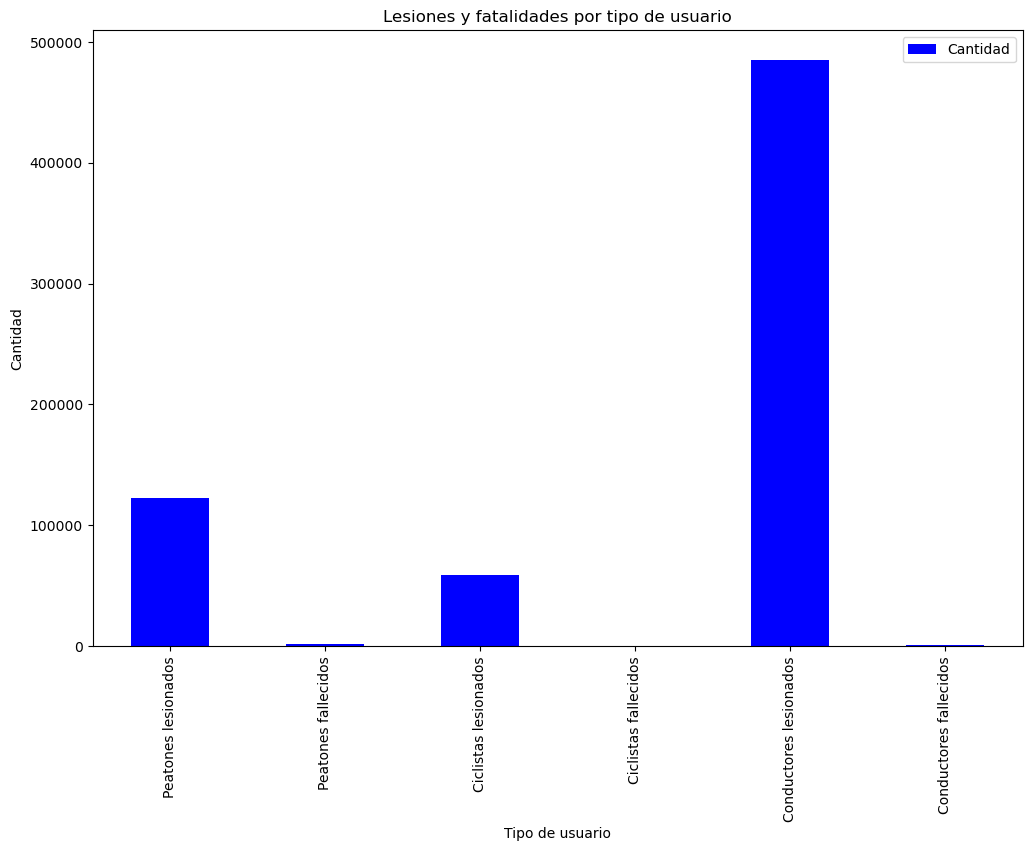

In [94]:
## EN DUDA POR TEMAS DE SABER SI LA INFORMACION PROPORCIONADA ES CORRECTA 
#Numero de personas lesionadas y fallecidas por el tipo de usuario
user_injuries_fatalities = {
    'Peatones lesionados': df['NUMBER OF PEDESTRIANS INJURED'].sum(),
    'Peatones fallecidos': df['NUMBER OF PEDESTRIANS KILLED'].sum(),
    'Ciclistas lesionados': df ['NUMBER OF CYCLIST INJURED'].sum(),
    'Ciclistas fallecidos': df ['NUMBER OF CYCLIST KILLED'].sum(),
    'Conductores lesionados': df['NUMBER OF MOTORIST INJURED'].sum(),
    'Conductores fallecidos': df['NUMBER OF MOTORIST KILLED'].sum(),
}
user_injuries_fatalities_df = pd.DataFrame(list(user_injuries_fatalities.items()), columns=['Tipo de usuario','Cantidad'])
user_injuries_fatalities_df.set_index('Tipo de usuario').plot(kind = 'bar',figsize=(12, 8),color = ['blue'],title='Lesiones y fatalidades por tipo de usuario')
plt.ylabel('Cantidad')
plt.show()








In [87]:
#Colisiones con multiples vehiculos 
multi_vehicle_collisions = df[(df['VEHICLE TYPE CODE 2']!='0')| (df['VEHICLE TYPE CODE 3']!= '0')].shape[0]
print(f"Colisiones que involucran multiples vehiculos:{multi_vehicle_collisions}")

Colisiones que involucran multiples vehiculos:1715060


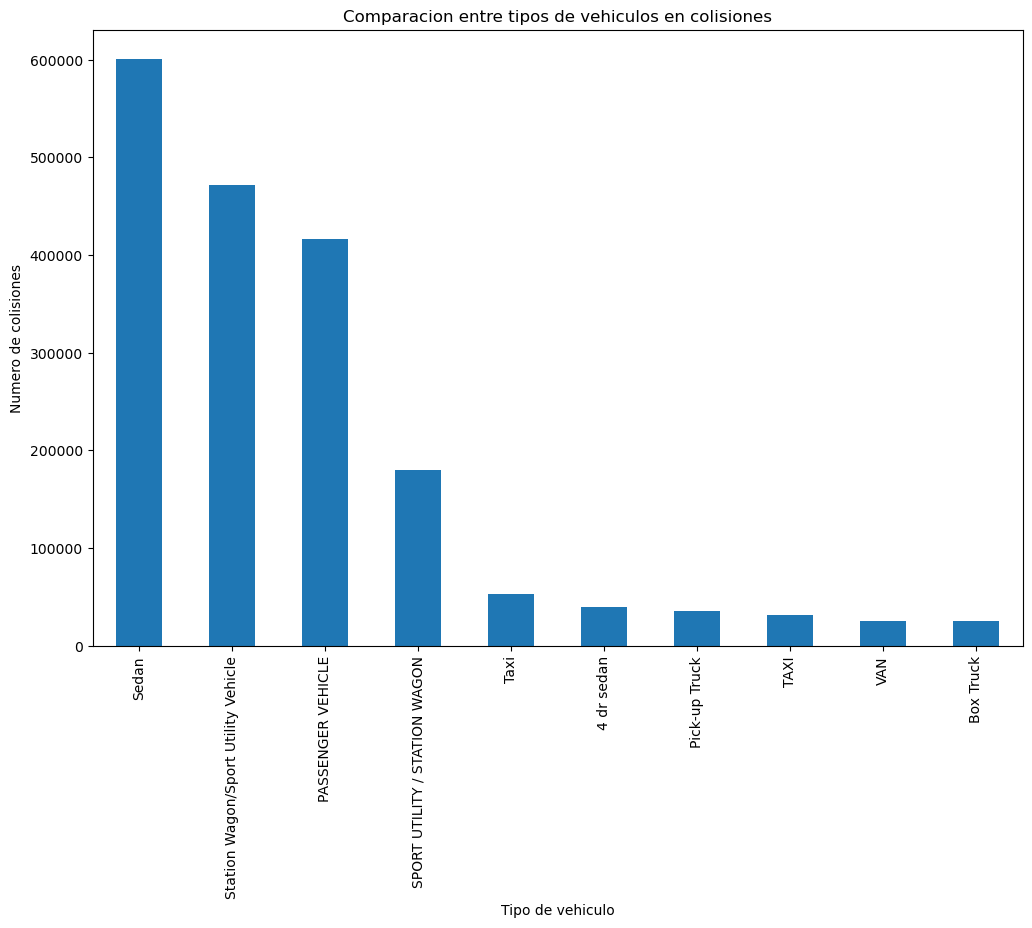

In [100]:
# Comparacion entre tipos de vehiculos involucrados en colisiones 
vehicle_comparasion = df['VEHICLE TYPE CODE 1'].value_counts().head(10)
vehicle_comparasion.plot(kind='bar',figsize=(12, 8),title = 'Comparacion entre tipos de vehiculos en colisiones')
plt.xlabel('Tipo de vehiculo')
plt.ylabel('Numero de colisiones')
plt.show()